In [1]:
using DataFrames
using Gadfly

In [6]:
# Load benchmark data from file
benchmarks = readtable("benchmarks.csv", header=false, names=[:language, :benchmark, :time])

# Capitalize and decorate language names from datafile
dict = Dict("c"=>"C", "julia"=>"Julia", "lua"=>"LuaJIT", "fortran"=>"Fortran", "java"=>"Java",
    "javascript"=>"JavaScript", "matlab"=>"Matlab", "mathematica"=>"Mathematica", 
    "python"=>"Python", "octave"=>"Octave", "r"=>"R", "go"=>"Go")

benchmarks[:language] = [dict[lang] for lang in benchmarks[:language]]

# Normalize benchmark times by C times
ctime = benchmarks[benchmarks[:language].== "C", :]
benchmarks = join(benchmarks, ctime, on=:benchmark)
delete!(benchmarks, :language_1)
rename!(benchmarks, :time_1, :ctime)
benchmarks[:normtime] = benchmarks[:time] ./ benchmarks[:ctime];

# Compute the geometric mean for each language
langs = [];
means = [];
priorities = [];
for lang in values(dict)
    data = benchmarks[benchmarks[:language].== lang, :]
    gmean = geomean(data[:normtime])
    push!(langs, lang)
    push!(means, gmean)
    if (lang == "C")
        push!(priorities, 1)
    elseif (lang == "Julia")
        push!(priorities, 2)        
    else
        push!(priorities, 3)
    end
end

# Add the geometric means back into the benchmarks dataframe
langmean = DataFrame(language=langs, geomean = means, priority = priorities)
benchmarks = join(benchmarks, langmean, on=:language)

# Put C first, Julia second, and sort the rest by geometric mean
sort!(benchmarks, cols=[:priority, :geomean]);

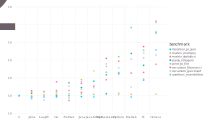

In [7]:
p = plot(benchmarks,
    x = :language,
    y = :normtime,
    color = :benchmark,
    Scale.y_log10,
    Guide.ylabel(nothing),
    Guide.xlabel(nothing),
    Coord.Cartesian(xmin=1,xmax=12.5,ymin=-1,ymax=5),
    Theme(
        guide_title_position = :left,
        colorkey_swatch_shape = :circle,
        minor_label_font = "Georgia",
        major_label_font = "Georgia",
    ),
)
draw(SVG(8inch,8inch/golden), p)

In [8]:
draw(SVG("_includes/benchmarks.svg", 8inch, 8inch/golden), p)

false

In [9]:
perm = sortperm(means)
for p in perm
    @show means[p], langs[p]
end

(means[p], langs[p]) = (1.0, "C")
(means[p], langs[p]) = (1.0711399425112786, "LuaJIT")
(means[p], langs[p]) = (1.0815157941511555, "Julia")
(means[p], langs[p]) = (1.487821520996975, "Go")
(means[p], langs[p]) = (1.4918547381316851, "Fortran")
(means[p], langs[p]) = (2.6821121259395135, "Java")
(means[p], langs[p]) = (3.4139723971166682, "JavaScript")
(means[p], langs[p]) = (13.838954463182521, "Mathematica")
(means[p], langs[p]) = (16.460774895048925, "Python")
(means[p], langs[p]) = (25.849512600565035, "Matlab")
(means[p], langs[p]) = (69.0954189269723, "R")
(means[p], langs[p]) = (587.367130848555, "Octave")
